In this lesson we're going to see how we can build neural networks capable of learning the complex kinds of relationships deep neural nets are famous for.

The key idea here is modularity, building up a complex network from simpler functional units. We've seen how a linear unit computes a linear function -- now we'll see how to combine and modify these single units to model more complex relationships.

Layers:
Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

Many Kinds of Layers
A "layer" in Keras is a very general kind of thing. A layer can be, essentially, any kind of data transformation. Many layers, like the convolutional and recurrent layers, transform data through use of neurons and differ primarily in the pattern of connections they form. Others though are used for feature engineering or just simple arithmetic. There's a whole world of layers to discover -- check them out!

The Activation Function:
It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something nonlinear. What we need are activation functions. Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions.

An activation function is simply some function we apply to each of a layer's outputs (its activations). The most common is the rectifier function  max(0,x).The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a bend in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a rectified linear unit or ReLU. (For this reason, it's common to call the rectifier function the "ReLU function".) Applying a ReLU activation to a linear unit means the output becomes [max(0, w * x + b)].



Stacking Dense Layers:
A stack of dense layers makes a "fully-connected" network.
The layers before the output layer are sometimes called hidden since we never see their outputs directly.

Now, notice that the final (output) layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.

Building Sequential Models:
The (Sequential) model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    #The hidden ReLU layers
    layers.Dense(units=4,activation ='relu', input_shape =[2]),
    layers.Dense(units=3,activation='relu'),
    #The linear output layer
    layers.Dense(units=1),
])

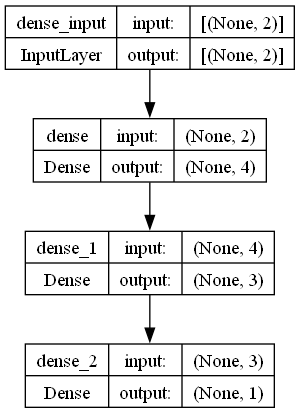

In [2]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

Let's explore activations functions some.

The usual way of attaching an activation function to a Dense layer is to include it as part of the definition with the activation argument. Sometimes though you'll want to put some other layer between the Dense layer and its activation function. (We'll see an example of this in Lesson 5 with batch normalization.) In this case, we can define the activation in its own Activation layer, like so:

layers.Dense(units=8),
layers.Activation('relu')
This is completely equivalent to the ordinary way: layers.Dense(units=8, activation='relu').

Rewrite the following model so that each activation is in its own Activation layer.

There is a whole family of variants of the 'relu' activation -- 'elu', 'selu', and 'swish', among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.